In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import pandas_profiling

%matplotlib inline

In [134]:
#Accessing the Database with the sqlite3 Package
#bundisliga_matchs = pd.read_csv('../data/match_bundesliga_matches_2014_until_2016.csv', sep='|', encoding='latin-1')
bundisliga_matchs = pd.read_csv('../data/Match_2014_2016_Second_Test.csv', encoding='latin-1')

# I created another csv file to make the preprocessing eaiser for the second test

In [135]:
bundisliga_matchs.set_index('id', inplace=True) # make id as id 

bundisliga_matchs

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                     
9645   2014/2015              9823              8721               2   
9646   2014/2015              9789              8178               0   
9647   2014/2015              9788             10269               1   
9648   2014/2015              8226              8406               2   
9649   2014/2015              9904             10189               2   
...          ...               ...               ...             ...   
10252  2015/2016              8406              8262               0   
10253  2015/2016              8697              9823               0   
10254  2015/2016              9810              9788               1   
10255  2015/2016              8722              9904               0   
10256  2015/2016              9905              9789               0   

       away_team_goal  B365H  B365D  B365A    BWH   BWD  ...    LBA    PSH  \
id                                                       ...                 
9645                1   1.25   6.00  10.00   1.26  5.75  ...  10.00   1.28   
9646                2   1.57   4.33   5.00   1.62  4.00  ...   5.50   1.63   
9647                1   1.95   3.50   3.75   1.95  3.50  ...   3.80   1.94   
9648                0   1.91   3.60   3.80   1.95  3.50  ...   3.75   1.96   
9649                1   2.90   3.50   2.30   2.85  3.50  ...   2.30   3.15   
...               ...    ...    ...    ...    ...   ...  ...    ...    ...   
10252               2   1.80   3.50   4.75   1.85  3.50  ...   4.50   1.83   
10253               1  17.00   7.00   1.18  12.00  7.00  ...   1.22  15.00   
10254               5   2.45   3.40   2.88   2.50  3.30  ...   2.90   2.40   
10255               1   1.95   3.50   4.00   1.95  3.40  ...   4.00   1.96   
10256               2   5.75   4.75   1.50   5.50  4.60  ...   1.48   6.74   

        PSD    PSA    WHH  WHD    WHA    VCH   VCD    VCA  
id                                                         
9645   6.47  12.00   1.20  7.0  12.00   1.29  6.00  12.00  
9646   4.39   5.56   1.62  4.2   5.00   1.65  4.00   6.00  
9647   3.73   4.22   1.95  3.5   3.80   1.95  3.60   4.20  
9648   3.83   4.02   1.95  3.5   3.80   2.00  3.75   3.75  
9649   3.58   2.37   3.20  3.2   2.30   3.20  3.50   2.38  
...     ...    ...    ...  ...    ...    ...   ...    ...  
10252  3.69   4.91   1.85  3.4   4.50   1.80  3.75   4.60  
10253  7.38   1.22  13.00  6.0   1.22  13.00  7.50   1.20  
10254  3.58   3.08   2.50  3.2   2.90   2.30  3.60   3.10  
10255  3.58   4.34   2.00  3.2   4.00   1.93  3.60   4.10  
10256  4.85   1.50   6.00  4.4   1.50   5.75  4.75   1.53  

[612 rows x 26 columns]

### The goal of this part is to add new column (Win 3pts,Lose 0pt,Draw 1pt) for the home_team_earned_points and away_team_earned_points based on home_team_goal and away_team_goal.


In [136]:
def pointsForHomeTeam(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 3 #win : 3pts
    if row['home_team_goal'] < row['away_team_goal']:
        return 0 #lose : 0pt
    else:
        return 1 #draw : 1pt

def pointsForAwayTeam(row):
    if row['home_team_goal'] < row['away_team_goal']:
        return 3 #win : 3pts
    if row['home_team_goal'] > row['away_team_goal']:
        return 0 #lose : 0pt
    else:
        return 1 #draw : 1pt

In [137]:
bundisliga_matchs['home_team_earned_points'] = bundisliga_matchs.apply(lambda row: pointsForHomeTeam(row), axis=1)
bundisliga_matchs['away_team_earned_points'] = bundisliga_matchs.apply(lambda row: pointsForAwayTeam(row), axis=1)

In [138]:
bundisliga_matchs

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                     
9645   2014/2015              9823              8721               2   
9646   2014/2015              9789              8178               0   
9647   2014/2015              9788             10269               1   
9648   2014/2015              8226              8406               2   
9649   2014/2015              9904             10189               2   
...          ...               ...               ...             ...   
10252  2015/2016              8406              8262               0   
10253  2015/2016              8697              9823               0   
10254  2015/2016              9810              9788               1   
10255  2015/2016              8722              9904               0   
10256  2015/2016              9905              9789               0   

       away_team_goal  B365H  B365D  B365A    BWH   BWD  ...   PSD    PSA  \
id                                                       ...                
9645                1   1.25   6.00  10.00   1.26  5.75  ...  6.47  12.00   
9646                2   1.57   4.33   5.00   1.62  4.00  ...  4.39   5.56   
9647                1   1.95   3.50   3.75   1.95  3.50  ...  3.73   4.22   
9648                0   1.91   3.60   3.80   1.95  3.50  ...  3.83   4.02   
9649                1   2.90   3.50   2.30   2.85  3.50  ...  3.58   2.37   
...               ...    ...    ...    ...    ...   ...  ...   ...    ...   
10252               2   1.80   3.50   4.75   1.85  3.50  ...  3.69   4.91   
10253               1  17.00   7.00   1.18  12.00  7.00  ...  7.38   1.22   
10254               5   2.45   3.40   2.88   2.50  3.30  ...  3.58   3.08   
10255               1   1.95   3.50   4.00   1.95  3.40  ...  3.58   4.34   
10256               2   5.75   4.75   1.50   5.50  4.60  ...  4.85   1.50   

         WHH  WHD    WHA    VCH   VCD    VCA  home_team_earned_points  \
id                                                                      
9645    1.20  7.0  12.00   1.29  6.00  12.00                        3   
9646    1.62  4.2   5.00   1.65  4.00   6.00                        0   
9647    1.95  3.5   3.80   1.95  3.60   4.20                        1   
9648    1.95  3.5   3.80   2.00  3.75   3.75                        3   
9649    3.20  3.2   2.30   3.20  3.50   2.38                        3   
...      ...  ...    ...    ...   ...    ...                      ...   
10252   1.85  3.4   4.50   1.80  3.75   4.60                        0   
10253  13.00  6.0   1.22  13.00  7.50   1.20                        0   
10254   2.50  3.2   2.90   2.30  3.60   3.10                        0   
10255   2.00  3.2   4.00   1.93  3.60   4.10                        0   
10256   6.00  4.4   1.50   5.75  4.75   1.53                        0   

       away_team_earned_points  
id                              
9645                         0  
9646                         3  
9647                         1  
9648                         0  
9649                         0  
...                        ...  
10252                        3  
10253                        3  
10254                        3  
10255                        3  
10256                        3  

[612 rows x 28 columns]

### Here, I count the points of each team. For that, I count the teams as home team and away team separetly and after that I collect both results



In [139]:
home_team_points = bundisliga_matchs.groupby('home_team_api_id').sum()[['home_team_earned_points']]
home_team_points.head()

home_team_earned_points
home_team_api_id                         
8177                                   54
8178                                   69
8226                                   54
8234                                   26
8262                                   12

In [140]:
away_team_points = bundisliga_matchs.groupby('away_team_api_id').sum()[['away_team_earned_points']]

away_team_points.head()

away_team_earned_points
away_team_api_id                         
8177                                   31
8178                                   52
8226                                   27
8234                                   14
8262                                   26

In [141]:
#home_team_points = home_team_points.set_index('home_team_api_id')
#away_team_points = away_team_points.set_index('away_team_api_id')

iJTeamPts = pd.merge(home_team_points,away_team_points, left_index=True, right_on='away_team_api_id')
iJTeamPts.head()

home_team_earned_points  away_team_earned_points
away_team_api_id                                                  
8177                                   54                       31
8178                                   69                       52
8226                                   54                       27
8234                                   26                       14
8262                                   12                       26

In [142]:
def sumToColumns(row):
    return row['home_team_earned_points'] + row['away_team_earned_points']

In [143]:
iJTeamPts['team_points'] = iJTeamPts.apply(lambda row: sumToColumns(row), axis=1)
iJTeamPts.head()

home_team_earned_points  away_team_earned_points  \
away_team_api_id                                                     
8177                                   54                       31   
8178                                   69                       52   
8226                                   54                       27   
8234                                   26                       14   
8262                                   12                       26   

                  team_points  
away_team_api_id               
8177                       85  
8178                      121  
8226                       81  
8234                       40  
8262                       38

### The last step is to associate the team_id to the team_name

In [144]:
bundisliga_team = pd.read_csv('../data/team_bundesliga_2014_until_2016.csv' , sep='|', encoding='latin-1')
bundisliga_team = bundisliga_team.set_index('team_api_id')
bundisliga_team.head()

id  team_fifa_api_id       team_long_name team_short_name
team_api_id                                                              
9823         15617                21     FC Bayern Munich             BMU
9790         15618                28         Hamburger SV             HAM
8178         15619                32  Bayer 04 Leverkusen             LEV
9789         15620                22    Borussia Dortmund             DOR
10189        15621                34        FC Schalke 04             S04

In [145]:
iJBundisligaTeamWithMatchs = pd.merge(bundisliga_team, iJTeamPts, left_index=True, right_on='away_team_api_id')
iJBundisligaTeamWithMatchs.head()

id  team_fifa_api_id       team_long_name  \
away_team_api_id                                                 
9823              15617                21     FC Bayern Munich   
9790              15618                28         Hamburger SV   
8178              15619                32  Bayer 04 Leverkusen   
9789              15620                22    Borussia Dortmund   
10189             15621                34        FC Schalke 04   

                 team_short_name  home_team_earned_points  \
away_team_api_id                                            
9823                         BMU                       89   
9790                         HAM                       42   
8178                         LEV                       69   
9789                         DOR                       75   
10189                        S04                       64   

                  away_team_earned_points  team_points  
away_team_api_id                                        
9823                                   78          167  
9790                                   34           76  
8178                                   52          121  
9789                                   49          124  
10189                                  36          100

In [146]:
teamNameAndPts = iJBundisligaTeamWithMatchs[['team_long_name', 'team_points']]
teamNameAndPts.head()

team_long_name  team_points
away_team_api_id                                  
9823                 FC Bayern Munich          167
9790                     Hamburger SV           76
8178              Bayer 04 Leverkusen          121
9789                Borussia Dortmund          124
10189                   FC Schalke 04          100

In [147]:
rankingOfTeams = teamNameAndPts.sort_values('team_points', ascending=False)
rankingOfTeams

team_long_name  team_points
away_team_api_id                                        
9823                       FC Bayern Munich          167
9789                      Borussia Dortmund          124
8178                    Bayer 04 Leverkusen          121
9788              Borussia MÃ¶nchengladbach          121
8721                          VfL Wolfsburg          114
10189                         FC Schalke 04          100
9905                        1. FSV Mainz 05           90
8406                            FC Augsburg           87
8177                      Hertha BSC Berlin           85
8722                            1. FC KÃ¶ln           83
8226                    TSG 1899 Hoffenheim           81
8697                       SV Werder Bremen           81
9810                    Eintracht Frankfurt           79
9790                           Hamburger SV           76
10269                         VfB Stuttgart           69
9904                            Hannover 96           62
8234                       FC Ingolstadt 04           40
8262                        SV Darmstadt 98           38
8358                            SC Freiburg           34
8460                        SC Paderborn 07           31

In [148]:
# Create a new column that is the rank of the value of coverage in ascending order
rankingOfTeams['rankingVal'] = rankingOfTeams['team_points'].rank(ascending=1)
rankingOfTeams

team_long_name  team_points  rankingVal
away_team_api_id                                                    
9823                       FC Bayern Munich          167        20.0
9789                      Borussia Dortmund          124        19.0
8178                    Bayer 04 Leverkusen          121        17.5
9788              Borussia MÃ¶nchengladbach          121        17.5
8721                          VfL Wolfsburg          114        16.0
10189                         FC Schalke 04          100        15.0
9905                        1. FSV Mainz 05           90        14.0
8406                            FC Augsburg           87        13.0
8177                      Hertha BSC Berlin           85        12.0
8722                            1. FC KÃ¶ln           83        11.0
8226                    TSG 1899 Hoffenheim           81         9.5
8697                       SV Werder Bremen           81         9.5
9810                    Eintracht Frankfurt           79         8.0
9790                           Hamburger SV           76         7.0
10269                         VfB Stuttgart           69         6.0
9904                            Hannover 96           62         5.0
8234                       FC Ingolstadt 04           40         4.0
8262                        SV Darmstadt 98           38         3.0
8358                            SC Freiburg           34         2.0
8460                        SC Paderborn 07           31         1.0

### Pandas Profiling report for matchs table 

In [149]:
bundisliga_matchs.profile_report(style={'full_width':True})

# Pre-processing

## Replacing missing values

estimate the missing values from the other training samples in our dataset.
I chose to replace the missing value by the mean value of the entire feature column.

IWH = Interwetten home win odds
IWD = Interwetten draw odds
IWA = Interwetten away win odds

The winner team have interwetten value less than the loser one. But it's not correct in all cases! Maybe we can create a function to replace the missing value OR it can be manually!?

https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [150]:
# Replace using median 
medianIWA = bundisliga_matchs['IWA'].median()
bundisliga_matchs['IWA'].fillna(medianIWA, inplace=True)

medianIWD = bundisliga_matchs['IWD'].median()
bundisliga_matchs['IWD'].fillna(medianIWD, inplace=True)

medianIWH = bundisliga_matchs['IWH'].median()
bundisliga_matchs['IWH'].fillna(medianIWH, inplace=True)

## Mapping features for seasons

To make sure that the learning algorithm interprets the ordinal features correctly, we
need to convert the categorical string values into integers by defining the mapping manually

In [151]:
seasons_mapping = {'2014/2015': 0,
                   '2015/2016': 1}

bundisliga_matchs['season'] = bundisliga_matchs['season'].map(seasons_mapping)
bundisliga_matchs.head()

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                 
9645       0              9823              8721               2   
9646       0              9789              8178               0   
9647       0              9788             10269               1   
9648       0              8226              8406               2   
9649       0              9904             10189               2   

      away_team_goal  B365H  B365D  B365A   BWH   BWD  ...   PSD    PSA   WHH  \
id                                                     ...                      
9645               1   1.25   6.00  10.00  1.26  5.75  ...  6.47  12.00  1.20   
9646               2   1.57   4.33   5.00  1.62  4.00  ...  4.39   5.56  1.62   
9647               1   1.95   3.50   3.75  1.95  3.50  ...  3.73   4.22  1.95   
9648               0   1.91   3.60   3.80  1.95  3.50  ...  3.83   4.02  1.95   
9649               1   2.90   3.50   2.30  2.85  3.50  ...  3.58   2.37  3.20   

      WHD   WHA   VCH   VCD    VCA  home_team_earned_points  \
id                                                            
9645  7.0  12.0  1.29  6.00  12.00                        3   
9646  4.2   5.0  1.65  4.00   6.00                        0   
9647  3.5   3.8  1.95  3.60   4.20                        1   
9648  3.5   3.8  2.00  3.75   3.75                        3   
9649  3.2   2.3  3.20  3.50   2.38                        3   

      away_team_earned_points  
id                             
9645                        0  
9646                        3  
9647                        1  
9648                        0  
9649                        0  

[5 rows x 28 columns]

## Replace the team ID by his rankingVal because we cannot use Ids as input (the value dont't make any order)


In [152]:
#teams mapping

teams_mapping = {9823: 20,
                  9789: 19,
                  8178: 18,
                  9788: 17,
                 8721: 16,
                 10189: 15,
                 9905: 14,
                 8406: 13,
                 8177: 12,
                 8722: 11,
                 8226: 10,
                 8697: 9,
                 9810: 8,
                 9790: 7,
                 10269: 6,
                 9904: 5,
                 8234: 4,
                 8262: 3,
                 8358: 2,
                 8460: 1,
                  }

In [153]:
bundisliga_matchs['home_team_api_id'] = bundisliga_matchs['home_team_api_id'].map(teams_mapping)
bundisliga_matchs['away_team_api_id'] = bundisliga_matchs['away_team_api_id'].map(teams_mapping)

bundisliga_matchs.head()

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                 
9645       0                20                16               2   
9646       0                19                18               0   
9647       0                17                 6               1   
9648       0                10                13               2   
9649       0                 5                15               2   

      away_team_goal  B365H  B365D  B365A   BWH   BWD  ...   PSD    PSA   WHH  \
id                                                     ...                      
9645               1   1.25   6.00  10.00  1.26  5.75  ...  6.47  12.00  1.20   
9646               2   1.57   4.33   5.00  1.62  4.00  ...  4.39   5.56  1.62   
9647               1   1.95   3.50   3.75  1.95  3.50  ...  3.73   4.22  1.95   
9648               0   1.91   3.60   3.80  1.95  3.50  ...  3.83   4.02  1.95   
9649               1   2.90   3.50   2.30  2.85  3.50  ...  3.58   2.37  3.20   

      WHD   WHA   VCH   VCD    VCA  home_team_earned_points  \
id                                                            
9645  7.0  12.0  1.29  6.00  12.00                        3   
9646  4.2   5.0  1.65  4.00   6.00                        0   
9647  3.5   3.8  1.95  3.60   4.20                        1   
9648  3.5   3.8  2.00  3.75   3.75                        3   
9649  3.2   2.3  3.20  3.50   2.38                        3   

      away_team_earned_points  
id                             
9645                        0  
9646                        3  
9647                        1  
9648                        0  
9649                        0  

[5 rows x 28 columns]

## Handle highly correlated features

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [154]:
from sklearn.model_selection import train_test_split
X, y = bundisliga_matchs.iloc[:, 3:].values, bundisliga_matchs.iloc[:, 1:3].values 
# X:  features: season, home_team_goal, away_team_goal
# y: class label : home_team_earned_points 	away_team_earned_points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [155]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = bundisliga_matchs.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[f],
                            importances[indices[f]]))

 1) home_team_api_id               0.068581
 2) away_team_api_id               0.063800
 3) home_team_goal                 0.057305
 4) away_team_goal                 0.046232
 5) B365H                          0.046156
 6) B365D                          0.043442
 7) B365A                          0.042270
 8) BWH                            0.042224
 9) BWD                            0.042219
10) BWA                            0.042089
11) IWH                            0.041448
12) IWD                            0.039518
13) IWA                            0.039427
14) LBH                            0.037588
15) LBD                            0.037255
16) LBA                            0.036878
17) PSH                            0.036589
18) PSD                            0.036174
19) PSA                            0.035893
20) WHH                            0.035788
21) WHD                            0.033960
22) WHA                            0.031744
23) VCH                         

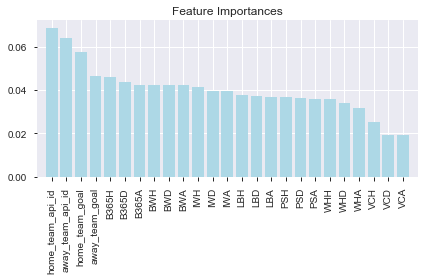

In [156]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
# I got the same result for normalized features

In [157]:
df_corr = bundisliga_matchs.corr()
df_corr.head()

threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = bundisliga_matchs.columns[columns]
selected_columns
bundisliga_matchs = bundisliga_matchs[selected_columns]
bundisliga_matchs

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                  
9645        0                20                16               2   
9646        0                19                18               0   
9647        0                17                 6               1   
9648        0                10                13               2   
9649        0                 5                15               2   
...       ...               ...               ...             ...   
10252       1                13                 3               0   
10253       1                 9                20               0   
10254       1                 8                17               1   
10255       1                11                 5               0   
10256       1                14                19               0   

       away_team_goal  B365H  B365D  B365A  home_team_earned_points  \
id                                                                    
9645                1   1.25   6.00  10.00                        3   
9646                2   1.57   4.33   5.00                        0   
9647                1   1.95   3.50   3.75                        1   
9648                0   1.91   3.60   3.80                        3   
9649                1   2.90   3.50   2.30                        3   
...               ...    ...    ...    ...                      ...   
10252               2   1.80   3.50   4.75                        0   
10253               1  17.00   7.00   1.18                        0   
10254               5   2.45   3.40   2.88                        0   
10255               1   1.95   3.50   4.00                        0   
10256               2   5.75   4.75   1.50                        0   

       away_team_earned_points  
id                              
9645                         0  
9646                         3  
9647                         1  
9648                         0  
9649                         0  
...                        ...  
10252                        3  
10253                        3  
10254                        3  
10255                        3  
10256                        3  

[612 rows x 10 columns]

## To See the improvement of the dataset after preprocessing

In [158]:
bundisliga_matchs.profile_report(style={'full_width':True})

### Training The First Model

In [159]:
bundisliga_matchs

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                  
9645        0                20                16               2   
9646        0                19                18               0   
9647        0                17                 6               1   
9648        0                10                13               2   
9649        0                 5                15               2   
...       ...               ...               ...             ...   
10252       1                13                 3               0   
10253       1                 9                20               0   
10254       1                 8                17               1   
10255       1                11                 5               0   
10256       1                14                19               0   

       away_team_goal  B365H  B365D  B365A  home_team_earned_points  \
id                                                                    
9645                1   1.25   6.00  10.00                        3   
9646                2   1.57   4.33   5.00                        0   
9647                1   1.95   3.50   3.75                        1   
9648                0   1.91   3.60   3.80                        3   
9649                1   2.90   3.50   2.30                        3   
...               ...    ...    ...    ...                      ...   
10252               2   1.80   3.50   4.75                        0   
10253               1  17.00   7.00   1.18                        0   
10254               5   2.45   3.40   2.88                        0   
10255               1   1.95   3.50   4.00                        0   
10256               2   5.75   4.75   1.50                        0   

       away_team_earned_points  
id                              
9645                         0  
9646                         3  
9647                         1  
9648                         0  
9649                         0  
...                        ...  
10252                        3  
10253                        3  
10254                        3  
10255                        3  
10256                        3  

[612 rows x 10 columns]

In [160]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [161]:
PlayedTeams, features = bundisliga_matchs.iloc[:, 1:3].values, bundisliga_matchs.iloc[:, 3:].values

# Normalize the ranking value
#PlayedTeams = mms.fit_transform(PlayedTeams)

In [162]:
PlayedTeams

array([[20, 16],
       [19, 18],
       [17,  6],
       ...,
       [ 8, 17],
       [11,  5],
       [14, 19]], dtype=int64)

In [163]:
features

array([[ 2.  ,  1.  ,  1.25, ..., 10.  ,  3.  ,  0.  ],
       [ 0.  ,  2.  ,  1.57, ...,  5.  ,  0.  ,  3.  ],
       [ 1.  ,  1.  ,  1.95, ...,  3.75,  1.  ,  1.  ],
       ...,
       [ 1.  ,  5.  ,  2.45, ...,  2.88,  0.  ,  3.  ],
       [ 0.  ,  1.  ,  1.95, ...,  4.  ,  0.  ,  3.  ],
       [ 0.  ,  2.  ,  5.75, ...,  1.5 ,  0.  ,  3.  ]])

Some Machine Learning terminology

    Feature — The input(s) to our model. In this case, two values — the teams.

    Labels — The output our model predicts. In this case, two values — the goals scored by each team.

## Create the model

We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

    input_shape=[2] — This specifies that the input to this layer are two values. That is, the shape is a two-dimensional array with two members representing teams ID.

    units=2 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. The size of the model's output — two float value representing goals scored.


This network has three layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **output** `tf.keras.layers.Dense` — A 10-node *softmax* layer, with each node representing a class of clothing. As in the previous layer, each node takes input from the 128 nodes in the layer before it. Each node weights the input according to learned parameters, and then outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.



In [164]:
l0 = tf.keras.layers.Dense(units=7, input_shape=[2])

#model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
 #   tf.keras.layers.Dense(25, activation=tf.nn.relu),
  #  tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
#])
#https://colab.research.google.com/drive/1t2v61hdyUPnaU2W8jDb2_Aoms7mFtiUQ#scrollTo=9ODch-OFCaW4

## Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [165]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

    Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

    Optimizer function — A way of adjusting internal values in order to reduce the loss
    
    
    The loss function [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) and the optimizer [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.
    
    
    
    
    Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

    Loss function — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
    Optimizer —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
    Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [166]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
    
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

## Train the model by calling the fit method

During training, the model takes the teams values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the goals equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.



In [167]:
history = model.fit(PlayedTeams, features, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display training statistics

The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the goals scored the model predicts is far from the corresponding value in teams ID.

We'll use Matplotlib to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

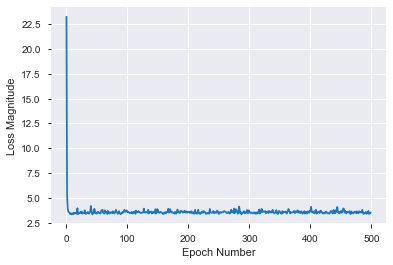

In [168]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between teams ID and scored goals. You can use the predict method to have it calculate the goals for a previously unknown two teams.


RESULT FIRST TEST Using team ranking value as input and scored Goals as features and output!

testedTeam = [20, 4]
predictedGoals = model.predict([testedTeam])
predictedGoals
=> array([[1.852833  , 0.24284887]], dtype=float32)



In [169]:
testedTeam = [4, 20]
predictedGoals = model.predict([testedTeam])
predictedGoals[:,0:2]

array([[1.1626112, 2.478301 ]], dtype=float32)

In [170]:
predictedGoals[:,0:2].round()

array([[1., 2.]], dtype=float32)

## Looking at the layer weights

In [171]:
print("These are the layer variables: {}".format(l0.get_weights()))

#https://www.tensorflow.org/guide/keras/save_and_serialize

These are the layer variables: [array([[ 0.07776515, -0.04073374, -0.11399157,  0.14379148,  0.47898877,
         0.08465083, -0.06026421],
       [-0.01359754,  0.06129932,  0.24665916,  0.01675662, -0.19884774,
        -0.05320611,  0.05615561]], dtype=float32), array([1.1235013, 1.4152497, 1.5744206, 2.6643858, 2.140267 , 1.0783824,
       1.5144619], dtype=float32)]


### The next step:  
- 
- To start testing using the points : The team with higher points (for all season) will win.
- Start thinking about training simple model using 2 teams as input, the points as hidden layers and the output the earned points by each team when they plays(win,draw,lost) for the home team (first written)
- Reuse the code above to make points/season?

### Partitioning a dataset in training and test sets

A convenient way to randomly partition this dataset into a separate test and training dataset is to use the
function from scikit-learn's train_test_split submodule cross_validation.


First, we assigned the NumPy array representation of feature columns 1-13 to the
variable X, and we assigned the class labels from the first column to the variable
y. Then, we used the function to randomly split and into train_test_split X y separate training and test datasets. By setting, we assigned 30 test_size=0.3 percent of the wine samples to and test, and the remaining 70 percent X_test y_
of the samples were assigned to and train, X_train y_ respectively

In [172]:
from sklearn.model_selection import train_test_split
X, y = bundisliga_matchs.iloc[:, 5:].values, bundisliga_matchs.iloc[:, 3:5].values 
# X:  features: season, home_team_goal, away_team_goal
# y: class label : home_team_earned_points 	away_team_earned_points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [173]:
X_train

array([[2.05, 3.25, 4.  , 3.  , 0.  ],
       [1.95, 3.5 , 4.  , 1.  , 1.  ],
       [4.  , 4.33, 1.75, 0.  , 3.  ],
       ...,
       [2.9 , 3.1 , 2.6 , 1.  , 1.  ],
       [2.2 , 3.4 , 3.3 , 3.  , 0.  ],
       [1.85, 3.75, 4.2 , 3.  , 0.  ]])

In [174]:
X_test

array([[ 2.15,  3.4 ,  3.4 ,  3.  ,  0.  ],
       [ 2.88,  3.2 ,  2.55,  0.  ,  3.  ],
       [ 2.45,  3.25,  3.  ,  1.  ,  1.  ],
       [ 2.15,  3.5 ,  3.3 ,  1.  ,  1.  ],
       [ 1.67,  4.  ,  5.  ,  1.  ,  1.  ],
       [ 2.4 ,  3.3 ,  3.  ,  1.  ,  1.  ],
       [ 1.08, 11.  , 26.  ,  3.  ,  0.  ],
       [ 2.5 ,  3.4 ,  2.8 ,  0.  ,  3.  ],
       [ 2.9 ,  3.2 ,  2.45,  1.  ,  1.  ],
       [ 9.5 ,  6.  ,  1.25,  0.  ,  3.  ],
       [ 2.75,  3.  ,  2.7 ,  3.  ,  0.  ],
       [ 2.2 ,  3.4 ,  3.25,  1.  ,  1.  ],
       [ 1.67,  3.75,  5.5 ,  1.  ,  1.  ],
       [ 2.3 ,  3.5 ,  2.9 ,  0.  ,  3.  ],
       [ 2.5 ,  3.1 ,  3.1 ,  3.  ,  0.  ],
       [ 3.3 ,  3.4 ,  2.2 ,  1.  ,  1.  ],
       [ 3.2 ,  3.4 ,  2.25,  1.  ,  1.  ],
       [ 2.15,  3.4 ,  3.4 ,  3.  ,  0.  ],
       [ 1.57,  4.33,  5.5 ,  3.  ,  0.  ],
       [ 1.8 ,  3.75,  4.33,  3.  ,  0.  ],
       [ 3.8 ,  3.6 ,  1.95,  0.  ,  3.  ],
       [ 4.75,  4.2 ,  1.67,  0.  ,  3.  ],
       [ 1.75,  3.8 ,  4.75,  3.

## Normalization of the features

In [175]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [176]:
X_train_norm

array([[0.054657  , 0.025     , 0.10168883, 1.        , 0.        ],
       [0.04907975, 0.05      , 0.10168883, 0.33333333, 0.33333333],
       [0.16341327, 0.133     , 0.02084082, 0.        , 1.        ],
       ...,
       [0.10206358, 0.01      , 0.0513834 , 0.33333333, 0.33333333],
       [0.06302287, 0.04      , 0.07653611, 1.        , 0.        ],
       [0.04350251, 0.075     , 0.10887531, 1.        , 0.        ]])

In [177]:
X_test_norm

array([[6.02342443e-02, 4.00000000e-02, 8.01293568e-02, 1.00000000e+00,
        0.00000000e+00],
       [1.00948132e-01, 2.00000000e-02, 4.95867769e-02, 0.00000000e+00,
        1.00000000e+00],
       [7.69659788e-02, 2.50000000e-02, 6.57563780e-02, 3.33333333e-01,
        3.33333333e-01],
       [6.02342443e-02, 5.00000000e-02, 7.65361121e-02, 3.33333333e-01,
        3.33333333e-01],
       [3.34634690e-02, 1.00000000e-01, 1.37621272e-01, 3.33333333e-01,
        3.33333333e-01],
       [7.41773564e-02, 3.00000000e-02, 6.57563780e-02, 3.33333333e-01,
        3.33333333e-01],
       [5.57724484e-04, 8.00000000e-01, 8.92202659e-01, 1.00000000e+00,
        0.00000000e+00],
       [7.97546012e-02, 4.00000000e-02, 5.85698886e-02, 0.00000000e+00,
        1.00000000e+00],
       [1.02063581e-01, 2.00000000e-02, 4.59935322e-02, 3.33333333e-01,
        3.33333333e-01],
       [4.70161740e-01, 3.00000000e-01, 2.87459576e-03, 0.00000000e+00,
        1.00000000e+00],
       [9.36977133e-02, 0.0000